<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [3]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Build `pair_is` from `det_df`

I need a function for selecting the detector pairs within a given theta range. I will add the option of including or discluding the detector pairs that include a channel directly next to the fission chamber. (There were triggering issues in these channels)

Patricia Schuster  
Jan 2018  
UM NERS  

In [4]:
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('spectral')
sns.set_style(style='white')

In [5]:
sys.path.append('../scripts/')
import bicorr as bicorr

In [6]:
%load_ext autoreload
%autoreload 2

# Load `det_df`

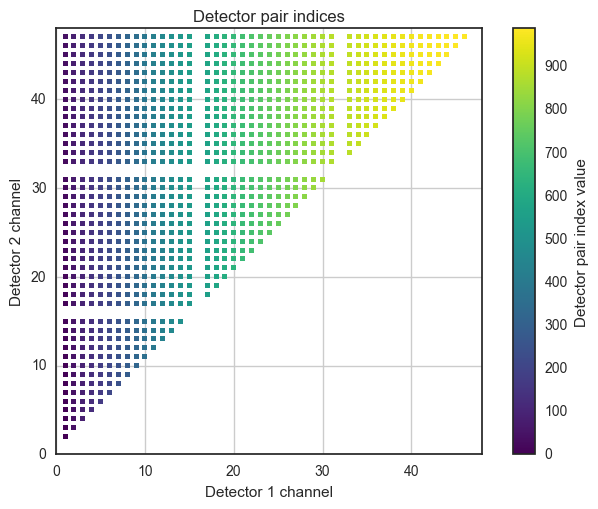

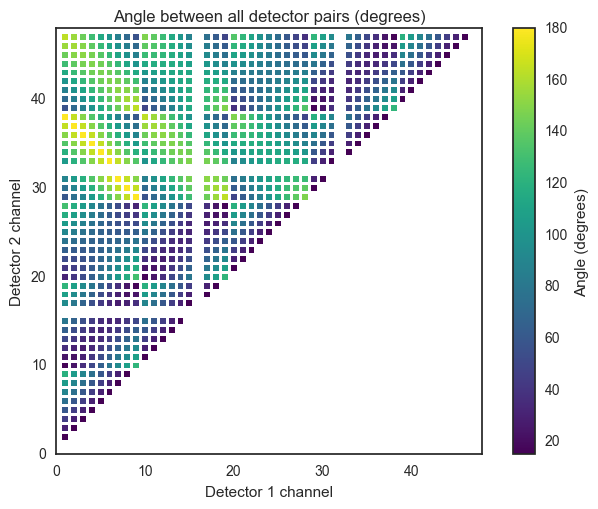

In [7]:
det_df = bicorr.load_det_df(plot_flag=True)

In [8]:
det_df.head()

,d1,d2,d1d2,angle
0,1,2,102,15.0
1,1,3,103,30.0
2,1,4,104,45.0
3,1,5,105,60.0
4,1,6,106,75.0


# Select pairs within a given angle range

In [9]:
th_min = 0
th_max = 20

In [19]:
ind_mask = (det_df['angle'] > th_min) & (det_df['angle'] <= th_max)

In [20]:
det_df[ind_mask].head()

,d1,d2,d1d2,angle
0,1,2,102,15.000000
8,1,10,110,16.328077
44,2,3,203,15.000000
87,3,4,304,15.000000
129,4,5,405,15.000000


In [21]:
det_df[ind_mask].index.values

array([  0,   8,  44,  87, 129, 170, 210, 249, 287, 332, 360, 368, 395,
       429, 462, 494, 525, 555, 584, 620, 639, 665, 690, 714, 737, 759,
       780, 800, 837, 845, 854, 870, 885, 899, 912, 924, 935, 953, 954,
       962, 969, 975, 980, 984, 987, 989], dtype=int64)

In [22]:
pair_is = det_df[ind_mask].index.values

# Select pairs that are not next to the fission chamber channel

In [69]:
chList, fcList, detList, num_dets, num_det_pairs = bicorr.build_ch_lists()

In [70]:
chIgnore = [1,17,33]

Ignore indices in `det_df` that include one of these channels.

In [77]:
det_df.head()

,d1,d2,d1d2,angle
0,1,2,102,15.0
1,1,3,103,30.0
2,1,4,104,45.0
3,1,5,105,60.0
4,1,6,106,75.0


In [85]:
det_df_ig = det_df[~det_df['d1'].isin(chIgnore) & ~det_df['d2'].isin(chIgnore)]
det_df_ig

,d1,d2,d1d2,angle
44,2,3,203,15.000000
45,2,4,204,30.000000
46,2,5,205,45.000000
47,2,6,206,60.000000
48,2,7,207,75.000000
49,2,8,208,90.000000
50,2,9,209,105.000000
51,2,10,210,24.647971
52,2,11,211,23.170902
53,2,12,212,29.872934


Make sure that we don't have any of those channels.

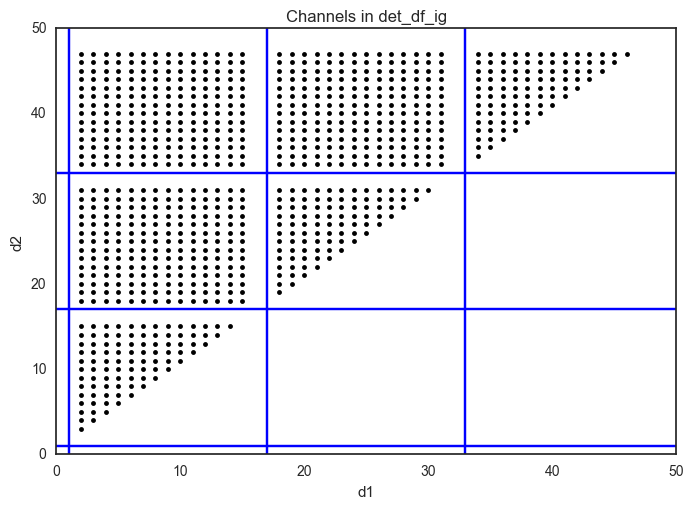

In [86]:
plt.plot(det_df_ig['d1'],det_df_ig['d2'],'.k')
plt.axvline( 1); plt.axhline( 1)
plt.axvline(17); plt.axhline(17)
plt.axvline(33); plt.axhline(33)
plt.xlabel('d1'); plt.ylabel('d2'); plt.title('Channels in det_df_ig')
plt.show()

# Combine those options to `bicorr.generate_pair_is`

In [87]:
import inspect

In [88]:
print(inspect.getsource(bicorr.generate_pair_is))

def generate_pair_is(det_df, th_min = None, th_max = None, i_bin = None, ignore_fc_neighbors_flag = False):
    """
    Generate list of indices of pairs within a given angle range (th_min,th_max] for bicorr_hist_master.
    
    Parameters
    ----------
    det_df : pandas dataFrame
        dataFrame of detector pair indices and angles 
    th_min : int, optional
        Exclusive lower limit (th > th_min)
    th_max : int, optional
        Inclusive upper limit (th <= th_max)  
    i_bin : int, optional
        Index of desired bin in det_df['bin']
    ignore_fc_neighbors_flag : bool, optional
        Whether to ignore channels next to fission chamber [1,17,33]
    
    Return
    ------
    pair_is : list
        Indices of detector pairs in range in bicorr_hist_master
    """
    
    # What are the conditions?    
    by_th_flag = np.logical_and(th_min is not None,th_max is not None) # True: by th range. False: by bins
    by_bin_flag = (i_bin is not None) # True: by bin range. F

In [89]:
bicorr.generate_pair_is(det_df,0,20)

array([  0,   8,  44,  87, 129, 170, 210, 249, 287, 332, 360, 368, 395,
       429, 462, 494, 525, 555, 584, 620, 639, 665, 690, 714, 737, 759,
       780, 800, 837, 845, 854, 870, 885, 899, 912, 924, 935, 953, 954,
       962, 969, 975, 980, 984, 987, 989], dtype=int64)

In [90]:
det_df.iloc[bicorr.generate_pair_is(det_df,0,20)]

,d1,d2,d1d2,angle
0,1,2,102,15.000000
8,1,10,110,16.328077
44,2,3,203,15.000000
87,3,4,304,15.000000
129,4,5,405,15.000000
170,5,6,506,15.000000
210,6,7,607,15.000000
249,7,8,708,15.000000
287,8,9,809,15.000000
332,9,19,919,16.328077


In [91]:
det_df.iloc[bicorr.generate_pair_is(det_df,0,20,ignore_fc_neighbors_flag=True)]

,d1,d2,d1d2,angle
44,2,3,203,15.000000
87,3,4,304,15.000000
129,4,5,405,15.000000
170,5,6,506,15.000000
210,6,7,607,15.000000
249,7,8,708,15.000000
287,8,9,809,15.000000
332,9,19,919,16.328077
360,10,11,1011,15.000000
368,10,20,1020,16.328077
